In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 20000)
pd.options.display.float_format = "{:.2f}".format
zbior = pd.read_csv('C:/Users/Laptop/Desktop/Stat/DATASET/train_LTFS.csv')

#usuniecie kropek z nazw zmiennych
zbior.rename(columns={'Date.of.Birth':'Date_of_Birth','Employment.Type':'Employment_Type','PERFORM_CNS.SCORE':'PERFORM_CNS_SCORE','PERFORM_CNS.SCORE.DESCRIPTION':'PERFORM_CNS_SCORE_DESCRIPTION','PRI.NO.OF.ACCTS':'PRI_NO_OF_ACCTS', 'PRI.ACTIVE.ACCTS':'PRI_ACTIVE_ACCTS', 'PRI.OVERDUE.ACCTS':'PRI_OVERDUE_ACCTS','NO.OF_INQUIRIES':'NO_OF_INQUIRIES','CREDIT.HISTORY.LENGTH':'CREDIT_HISTORY_LENGTH','AVERAGE.ACCT.AGE':'AVERAGE_ACCT_AGE','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS':'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS','NEW.ACCTS.IN.LAST.SIX.MONTHS':'NEW_ACCTS_IN_LAST_SIX_MONTHS','SEC.INSTAL.AMT':'SEC_INSTAL_AMT','PRIMARY.INSTAL.AMT':'PRIMARY_INSTAL_AMT','SEC.DISBURSED.AMOUNT':'SEC_DISBURSED_AMOUNT','SEC.SANCTIONED.AMOUNT':'SEC_SANCTIONED_AMOUNT','SEC.CURRENT.BALANCE':'SEC_CURRENT_BALANCE','SEC.OVERDUE.ACCTS':'SEC_OVERDUE_ACCTS','SEC.ACTIVE.ACCTS':'SEC_ACTIVE_ACCTS','SEC.NO.OF.ACCTS':'SEC_NO_OF_ACCTS','PRI.DISBURSED.AMOUNT':'PRI_DISBURSED_AMOUNT','PRI.SANCTIONED.AMOUNT':'PRI_SANCTIONED_AMOUNT','PRI.CURRENT.BALANCE':'PRI_CURRENT_BALANCE',}, inplace=True)

#usuwa wartości "n/a"
#zbior.dropna(inplace=True)

#edycja datu urodzenia do wieku (z pominięciem metody "pd.DatetimeIndex(zbior['Date_of_Birth']).year" z powodu błędu daty przed rokiem 1970)
zbior['rok_ur2'] = zbior['Date_of_Birth'].str[-2:]
zbior['rok_ur2'] = zbior['rok_ur2'].astype(str).astype(int)
zbior['wiek'] = 120 - zbior['rok_ur2']
#korekta przeliczenia wieku
zbior.wiek.replace([120], [20], inplace=True)

#edycja zmiennej "AVERAGE_ACCT_AGE" z typu "object" do wartości wyrazonej w miesiacach, typu int32
zbior['acc_age_rok'] = zbior['AVERAGE_ACCT_AGE'].str[:2]
#usuwa wszystkie znaki, ktore nie sa cyframi
zbior['acc_age_rok'].replace(regex=True, inplace= True, to_replace=r'\D', value=r'')
zbior['acc_age_mies'] = zbior['AVERAGE_ACCT_AGE'].str[-5:-3]
zbior['acc_age_rok'] = zbior['acc_age_rok'].astype(str).astype(int)
zbior['acc_age_mies'] = zbior['acc_age_mies'].astype(str).astype(int)
zbior['AVERAGE_ACCT_AGE_mth'] = zbior['acc_age_rok'] *12 + zbior['acc_age_mies']

#edycja zmiennej "CREDIT_HISTORY_LENGTH" z typu "object" do wartości wyrazonej w miesiacach, typu int32
zbior['credit_hist_rok'] = zbior['CREDIT_HISTORY_LENGTH'].str[:2]
#usuwa wszystkie znaki, ktore nie sa cyframi
zbior['credit_hist_rok'].replace(regex=True, inplace= True, to_replace=r'\D', value=r'')
zbior['credit_hist_mies'] = zbior['CREDIT_HISTORY_LENGTH'].str[-5:-3]
zbior['credit_hist_mies'].replace(regex=True, inplace= True, to_replace=r'\D', value=r'')
zbior['credit_hist_rok'] = zbior['credit_hist_rok'].astype(str).astype(int)
zbior['credit_hist_mies'] = zbior['credit_hist_mies'].astype(str).astype(int)
zbior['CREDIT_HISTORY_LENGTH_mth'] = zbior['credit_hist_rok'] *12 + zbior['credit_hist_mies']

#usuwa kolumny robocze oraz zmienną "MobileNo_Avl_Flag" (zmienna przyjmuje tylko jedną wartość)
#zbior.drop(['MobileNo_Avl_Flag','rok_ur2','acc_age_rok', 'acc_age_mies', 'credit_hist_rok', 'credit_hist_mies'], axis=1, inplace=True )

#przekształcenie zmiennnej "Employment_Type" z typu object do int64
zbior.Employment_Type.replace(['Salaried', 'Self employed'], [1, 2], inplace=True)

#przekształca zmienną "PERFORM_CNS_SCORE_DESCRIPTION" w szereg zmiennych binarnych
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'A-Very Low Risk', 'SCORE_DESC_A_VLR'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'B-Very Low Risk', 'SCORE_DESC_B_VLR'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'C-Very Low Risk', 'SCORE_DESC_C_VLR'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'D-Very Low Risk', 'SCORE_DESC_D_VLR'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'E-Low Risk', 'SCORE_DESC_E_LR'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'F-Low Risk', 'SCORE_DESC_F_LR'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'G-Low Risk', 'SCORE_DESC_G_LR'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'H-Medium Risk', 'SCORE_DESC_H_MR'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'I-Medium Risk', 'SCORE_DESC_I_MR'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'J-High Risk', 'SCORE_DESC_J_HR'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'K-High Risk', 'SCORE_DESC_K_HR'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'L-Very High Risk', 'SCORE_DESC_L_VHR'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'M-Very High Risk', 'SCORE_DESC_M_VHR'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'No Bureau History Available', 'SCORE_DESC_N1'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'Not Scored: Sufficient History Not Available', 'SCORE_DESC_N2'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'Not Scored: Not Enough Info available on the customer', 'SCORE_DESC_N3'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'Not Scored: No Activity seen on the customer (Inactive)', 'SCORE_DESC_N4'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'Not Scored: No Updates available in last 36 months', 'SCORE_DESC_N5'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'Not Scored: Only a Guarantor', 'SCORE_DESC_N6'] = 1
zbior.loc[zbior['PERFORM_CNS_SCORE_DESCRIPTION'] == 'Not Scored: More than 50 active Accounts found', 'SCORE_DESC_N7'] = 1
zbior.fillna(0, inplace=True)

#agregowanie kategorii zmiennej "PERFORM_CNS_SCORE_DESCRIPTION"
zbior['PERFORM_CNS_SCORE_DESCRIPTION2'] = zbior.PERFORM_CNS_SCORE_DESCRIPTION
zbior.PERFORM_CNS_SCORE_DESCRIPTION2.replace(['No Bureau History Available', 
                                              'C-Very Low Risk', 
                                              'A-Very Low Risk', 
                                              'D-Very Low Risk', 
                                              'B-Very Low Risk', 
                                              'M-Very High Risk', 
                                              'F-Low Risk', 
                                              'K-High Risk', 
                                              'H-Medium Risk', 
                                              'E-Low Risk', 
                                              'I-Medium Risk', 
                                              'G-Low Risk', 
                                              'Not Scored: Sufficient History Not Available', 
                                              'J-High Risk', 
                                              'Not Scored: Not Enough Info available on the customer', 
                                              'Not Scored: No Activity seen on the customer (Inactive)', 
                                              'Not Scored: No Updates available in last 36 months', 
                                              'L-Very High Risk', 
                                              'Not Scored: Only a Guarantor', 
                                              'Not Scored: More than 50 active Accounts found'], 
                                             
                                             ['Not Scored', 
                                              'Very Low Risk', 
                                              'Very Low Risk', 
                                              'Very Low Risk', 
                                              'Very Low Risk', 
                                              'Very High Risk', 
                                              'Low Risk', 
                                              'High Risk', 
                                              'Medium Risk', 
                                              'Low Risk', 
                                              'Medium Risk', 
                                              'Low Risk', 
                                              'Not Scored', 
                                              'High Risk', 
                                              'Not Scored', 
                                              'Not Scored', 
                                              'Not Scored', 
                                              'Very High Risk', 
                                              'Not Scored', 
                                              'Not Scored' ], 
                                             inplace=True)

#kod pomocniczy:
#zbior['PERFORM_CNS_SCORE_DESCRIPTION2'].value_counts()
#zbior.info()
#for col in zbior.columns:
#    print(col)


In [ ]:
#wydzielenie identyfikatorów klientów do ograniczenia zmiennej "Date_of_Birth"
zbior2 = zbior[['UniqueID', 'Date_of_Birth']]
zbior2.info()
zbior2.sort_values('Date_of_Birth')
count = zbior2.groupby(['Date_of_Birth']).count()
print(count)
count_df = pd.DataFrame(count)
count_df = count_df.reset_index()
sort_by = count_df.sort_values('count', ascending=False)
top138 = sort_by.head(138)
print(top138)
top138.info()
top138.to_excel('top138.xlsx')

#wyliczenie wartości unikalnych
zbior2 = zbior[['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date_of_Birth', 'Employment_Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'wiek', 'acc_age_rok', 'acc_age_mies', 'AVERAGE_ACCT_AGE_mth', 'CREDIT_HISTORY_LENGTH_mth', 'PERFORM_CNS_SCORE_DESCRIPTION2', 
]]
zbior2.nunique()

C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

Text(0.5, 1.0, 'Wskaźnik LTV')

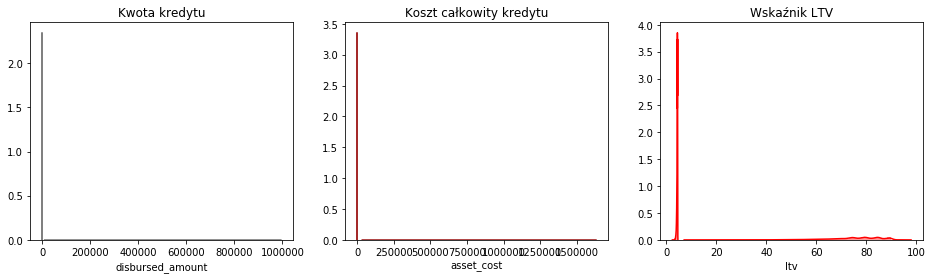

In [165]:
#przekształcenie logarytmiczne zmiennych ciągłych kredytu
zbior['disbursed_amount_log'] = np.log1p(zbior['disbursed_amount'])
zbior['asset_cost_log'] = np.log1p(zbior['asset_cost'])
zbior['ltv_log'] = np.log1p(zbior['ltv'])

#wykresy zmiennych kredytu, przed i po przekształceniu log.
plt.rcParams['figure.figsize'] = (16, 4)

plt.subplot(1, 3, 1)
sns.distplot(zbior['disbursed_amount_log'], color = 'grey')
plt.title('Kwota kredytu')

plt.subplot(1, 3, 2)
sns.distplot(zbior['asset_cost_log'], color = 'brown')
plt.title('Koszt całkowity kredytu')

plt.subplot(1, 3, 3)
sns.distplot(zbior['ltv_log'], color = 'red')
plt.title('Wskaźnik LTV')

plt.rcParams['figure.figsize'] = (16, 4)

plt.subplot(1, 3, 1)
sns.distplot(zbior['disbursed_amount'], color = 'grey')
plt.title('Kwota kredytu')

plt.subplot(1, 3, 2)
sns.distplot(zbior['asset_cost'], color = 'brown')

plt.title('Koszt całkowity kredytu')

plt.subplot(1, 3, 3)
sns.distplot(zbior['ltv'], color = 'red')
plt.title('Wskaźnik LTV')


In [171]:
#przekształcenie logarytmiczne zmiennych ciągłych kredytu
zbior['disbursed_amount_log'] = np.log1p(zbior['disbursed_amount'])
zbior['asset_cost_log'] = np.log1p(zbior['asset_cost'])
zbior['ltv_log'] = np.log1p(zbior['ltv'])

In [173]:
zbior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 73 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date_of_Birth                          233154 non-null object
Employment_Type                        233154 non-null float64
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                  

In [7]:
zbior.wiek.replace([120], [20], inplace=True)
zbior['wiek'].value_counts()

25    10584
26    10530
28    10390
24    10211
30    10116
27    10007
29     9385
32     9232
31     8903
33     8633
34     8441
35     7922
23     7489
36     7481
37     7140
38     7018
40     6788
39     6178
42     5883
45     5627
41     5614
44     5581
43     5310
46     4638
47     4466
48     4366
50     4063
49     3721
51     3147
52     3081
53     2522
55     2397
54     2268
22     2188
56     1773
21     1604
57     1556
58     1478
60     1241
59     1173
61      816
20      632
62      621
63      412
64      337
65      169
66       21
71        1
Name: wiek, dtype: int64

In [284]:
zbior.PERFORM_CNS_SCORE_DESCRIPTION2.replace(['No Bureau History Available'], ['Not Scored'])

0             Not Scored
1            Medium Risk
2             Not Scored
3         Very High Risk
4             Not Scored
               ...      
233149     Very Low Risk
233150     Very Low Risk
233151        Not Scored
233152        Not Scored
233153        Not Scored
Name: PERFORM_CNS_SCORE_DESCRIPTION2, Length: 225493, dtype: object

In [3]:
zbior['PERFORM_CNS_SCORE_DESCRIPTION2'].value_counts()

Not Scored        124253
Very Low Risk      49671
Low Risk           17906
Medium Risk        12135
High Risk          11774
Very High Risk      9754
Name: PERFORM_CNS_SCORE_DESCRIPTION2, dtype: int64

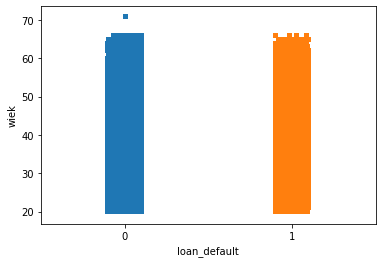

In [8]:
sns.stripplot(y='wiek', x='loan_default', data=zbior, jitter=True, dodge=True, marker=',')

In [41]:
zbior2= zbior[['Date_of_Birth', 'wiek']]
zbior2.to_excel('zbior2.xlsx')

In [92]:
for col in zbior.columns:
    print(col)

UniqueID
disbursed_amount
asset_cost
ltv
branch_id
supplier_id
manufacturer_id
Current_pincode_ID
Date_of_Birth
Employment_Type
DisbursalDate
State_ID
Employee_code_ID
MobileNo_Avl_Flag
Aadhar_flag
PAN_flag
VoterID_flag
Driving_flag
Passport_flag
PERFORM_CNS_SCORE
PERFORM_CNS_SCORE_DESCRIPTION
PRI_NO_OF_ACCTS
PRI_ACTIVE_ACCTS
PRI_OVERDUE_ACCTS
PRI_CURRENT_BALANCE
PRI_SANCTIONED_AMOUNT
PRI_DISBURSED_AMOUNT
SEC_NO_OF_ACCTS
SEC_ACTIVE_ACCTS
SEC_OVERDUE_ACCTS
SEC_CURRENT_BALANCE
SEC_SANCTIONED_AMOUNT
SEC_DISBURSED_AMOUNT
PRIMARY_INSTAL_AMT
SEC_INSTAL_AMT
NEW_ACCTS_IN_LAST_SIX_MONTHS
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS
AVERAGE_ACCT_AGE
CREDIT_HISTORY_LENGTH
NO_OF_INQUIRIES
loan_default
rok_ur2
wiek
acc_age_rok
acc_age_mies
AVERAGE_ACCT_AGE_mth
credit_hist_rok
credit_hist_mies
CREDIT_HISTORY_LENGTH_mth
SCORE_DESC_A_VLR
SCORE_DESC_B_VLR
SCORE_DESC_C_VLR
SCORE_DESC_D_VLR
SCORE_DESC_E_LR
SCORE_DESC_F_LR
SCORE_DESC_G_LR
SCORE_DESC_H_MR
SCORE_DESC_I_MR
SCORE_DESC_J_HR
SCORE_DESC_K_HR
SCORE_DESC_L

In [32]:
zbior.AVERAGE_ACCT_AGE.head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     0yrs 8mon
4     0yrs 0mon
Name: AVERAGE_ACCT_AGE, dtype: object

In [69]:
urodz = pd.DataFrame(zbior['Date_of_Birth'].value_counts())
print(urodz)

          Date_of_Birth
01-01-88           2173
01-01-90           2170
01-01-87           2127
01-01-86           2063
01-01-85           2005
01-01-91           1985
01-01-89           1962
01-01-93           1930
01-01-95           1924
01-01-92           1924
01-01-94           1867
01-01-83           1841
01-01-80           1821
01-01-84           1768
01-01-81           1764
01-01-96           1759
01-01-82           1691
01-01-78           1646
01-01-75           1641
01-01-97           1557
01-01-76           1527
01-01-77           1469
01-01-79           1438
01-01-73           1335
01-01-74           1273
01-01-70           1203
01-01-71           1142
01-01-72           1100
01-01-68            911
01-01-69            875
01-01-65            702
01-01-67            683
01-01-66            642
01-01-64            441
01-01-63            439
01-01-60            379
01-01-62            364
01-01-61            358
01-01-98            345
01-06-76            297
01-01-99        

In [57]:
urodz.head()

,Date_of_Birth
01-01-88,2173
01-01-90,2170
01-01-87,2127
01-01-86,2063
01-01-85,2005


In [74]:
plt.hist(zbior['Date_of_Birth'])

(array([88812., 30110., 24685., 21202., 19519., 16118., 13321.,  9869.,
         6328.,  3190.]),
 array([    0. ,  1543.2,  3086.4,  4629.6,  6172.8,  7716. ,  9259.2,
        10802.4, 12345.6, 13888.8, 15432. ]),
 <a list of 10 Patch objects>)

Error in callback <function flush_figures at 0x0000022E73D9C798> (for post_execute):


KeyboardInterrupt: 

In [58]:
urodz.to_excel('urodz.xlsx')

In [65]:
urodz.groupby(['Date_of_Birth']).agg(sum)

""
Date_of_Birth
1
2
3
4
5
6
7
8
9


(array([1.5386e+04, 1.2000e+01, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        4.0000e+00, 3.0000e+00, 5.0000e+00, 9.0000e+00, 7.0000e+00]),
 array([1.0000e+00, 2.1820e+02, 4.3540e+02, 6.5260e+02, 8.6980e+02,
        1.0870e+03, 1.3042e+03, 1.5214e+03, 1.7386e+03, 1.9558e+03,
        2.1730e+03]),
 <a list of 10 Patch objects>)

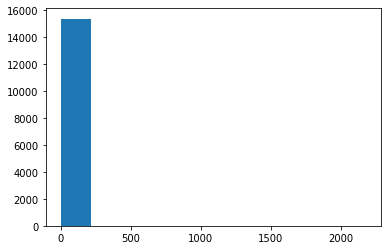

In [59]:
plt.hist(urodz.Date_of_Birth)
#plt.xticks([20, 25, 30, 35, 40, 45, 50, 55, 60, 65])
#plt.title('Wiek klientów')

In [66]:
zbior.acc_age_mth.to_excel('ACC_AGE.xlsx')

In [65]:
zbior['acc_age_mth'].value_counts()

0      114135
6        5907
7        5254
11       5110
10       5005
        ...  
182         1
227         1
270         1
169         1
167         1
Name: acc_age_mth, Length: 192, dtype: int64

In [44]:
zbior['CREDIT_HISTORY_LENGTH_mth'].value_counts()

0      119127
6        4761
25       4745
7        4017
24       3833
        ...  
296         1
339         1
249         1
274         1
288         1
Name: CREDIT_HISTORY_LENGTH_mth, Length: 294, dtype: int64

In [12]:
#"zbior['rok_ur'] = pd.DatetimeIndex(zbior['Date_of_Birth']).year" - metoda nie dziala, podje zle wyniki dla lat przed 1970;

In [1]:
zbior.wiek2.describe()

NameError: name 'zbior' is not defined

25     10584
26     10530
28     10390
24     10211
30     10116
27     10007
29      9385
32      9232
31      8903
33      8633
34      8441
35      7922
23      7489
36      7481
37      7140
38      7018
40      6788
39      6178
42      5883
45      5627
41      5614
44      5581
43      5310
46      4638
47      4466
48      4366
50      4063
49      3721
51      3147
52      3081
53      2522
55      2397
54      2268
22      2188
56      1773
21      1604
57      1556
58      1478
60      1241
59      1173
61       816
120      632
62       621
63       412
64       337
65       169
66        21
71         1
Name: wiek, dtype: int64

In [98]:
zbior2 = zbior[['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date_of_Birth', 'Employment_Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'wiek', 'acc_age_rok', 'acc_age_mies', 'AVERAGE_ACCT_AGE_mth', 'CREDIT_HISTORY_LENGTH_mth', 'PERFORM_CNS_SCORE_DESCRIPTION2', 
]]

In [99]:
zbior2.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date_of_Birth                           15433
Employment_Type                             3
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
PERFORM_CNS_SCORE                         573
PERFORM_CNS_SCORE_DESCRIPTION              20
PRI_NO_OF_ACCTS                           108
PRI_ACTIVE_ACCTS                           40
PRI_OVERDUE_ACCTS                          22
PRI_CURRENT_BALANCE                     71341
PRI_SANCTIONED_AMOUNT                   44390
PRI_DISBURSED_AMOUNT                    47909
SEC_NO_OF_ACCTS                   

In [95]:
zbior.nunique()
#nazwa kolumny nie moze zawierac kropki, inaczej nunique nie dziala (trakruje wartosc po kropce jako atrybut)

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date_of_Birth                           15433
Employment_Type                             3
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS_SCORE                         573
PERFORM_CNS_SCORE_DESCRIPTION              20
PRI_NO_OF_ACCTS                   

In [115]:
Q1 = zbior.disbursed_amount_log.quantile(0,25)

ValueError: interpolation can only be 'linear', 'lower' 'higher', 'midpoint', or 'nearest'

In [249]:
korel = zbior3[['loan_default',
               'wiek', 
               'Employment_Type',
               'Aadhar_flag', 
               'PAN_flag', 
               'VoterID_flag',
               'Driving_flag',
               'Passport_flag',
               'disbursed_amount',
               'disbursed_amount_log',
               'asset_cost',
               'asset_cost_log',
               'ltv', 
               'ltv_log',
               'branch_id',
               'supplier_id',
               'manufacturer_id',
               'State_ID',
               'Employee_code_ID',
               'PERFORM_CNS_SCORE', 
               'PRI_NO_OF_ACCTS', 
               'PRI_ACTIVE_ACCTS', 
               'PRI_OVERDUE_ACCTS', 
               'PRI_CURRENT_BALANCE', 
               'PRI_SANCTIONED_AMOUNT', 
               'PRI_DISBURSED_AMOUNT', 
               'SEC_NO_OF_ACCTS', 
               'SEC_ACTIVE_ACCTS', 
               'SEC_OVERDUE_ACCTS', 
               'SEC_CURRENT_BALANCE', 
               'SEC_SANCTIONED_AMOUNT', 
               'SEC_DISBURSED_AMOUNT', 
               'PRIMARY_INSTAL_AMT', 
               'SEC_INSTAL_AMT', 
               'NEW_ACCTS_IN_LAST_SIX_MONTHS', 
               'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
               'NO_OF_INQUIRIES', 
               'AVERAGE_ACCT_AGE_mth', 
               'CREDIT_HISTORY_LENGTH_mth', 
               'SCORE_DESC_A_VLR',
               'SCORE_DESC_B_VLR',
               'SCORE_DESC_C_VLR',
               'SCORE_DESC_D_VLR',
               'SCORE_DESC_E_LR',
               'SCORE_DESC_F_LR',
               'SCORE_DESC_G_LR',
               'SCORE_DESC_H_MR',
               'SCORE_DESC_I_MR',
               'SCORE_DESC_J_HR',
               'SCORE_DESC_K_HR',
               'SCORE_DESC_L_VHR',
               'SCORE_DESC_M_VHR',
               'SCORE_DESC_N1',
               'SCORE_DESC_N2',
               'SCORE_DESC_N3',
               'SCORE_DESC_N4',
               'SCORE_DESC_N5',
               'SCORE_DESC_N6',
               'SCORE_DESC_N7', ]]

In [254]:
corr = korel.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

#corr.info()

In [257]:
corr.to_excel('kor.xlsx')

In [157]:
corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, loan_default to SCORE_DESC_N7
Data columns (total 59 columns):
loan_default                           59 non-null float64
wiek                                   59 non-null float64
Employment_Type                        59 non-null float64
Aadhar_flag                            59 non-null float64
PAN_flag                               59 non-null float64
VoterID_flag                           59 non-null float64
Driving_flag                           59 non-null float64
Passport_flag                          59 non-null float64
disbursed_amount                       59 non-null float64
disbursed_amount_log                   59 non-null float64
asset_cost                             59 non-null float64
asset_cost_log                         59 non-null float64
ltv                                    59 non-null float64
ltv_log                                59 non-null float64
branch_id                              59 non-null flo

In [255]:
corr2 = pd.DataFrame(corr)

In [29]:
corr2.to_html('table.html')

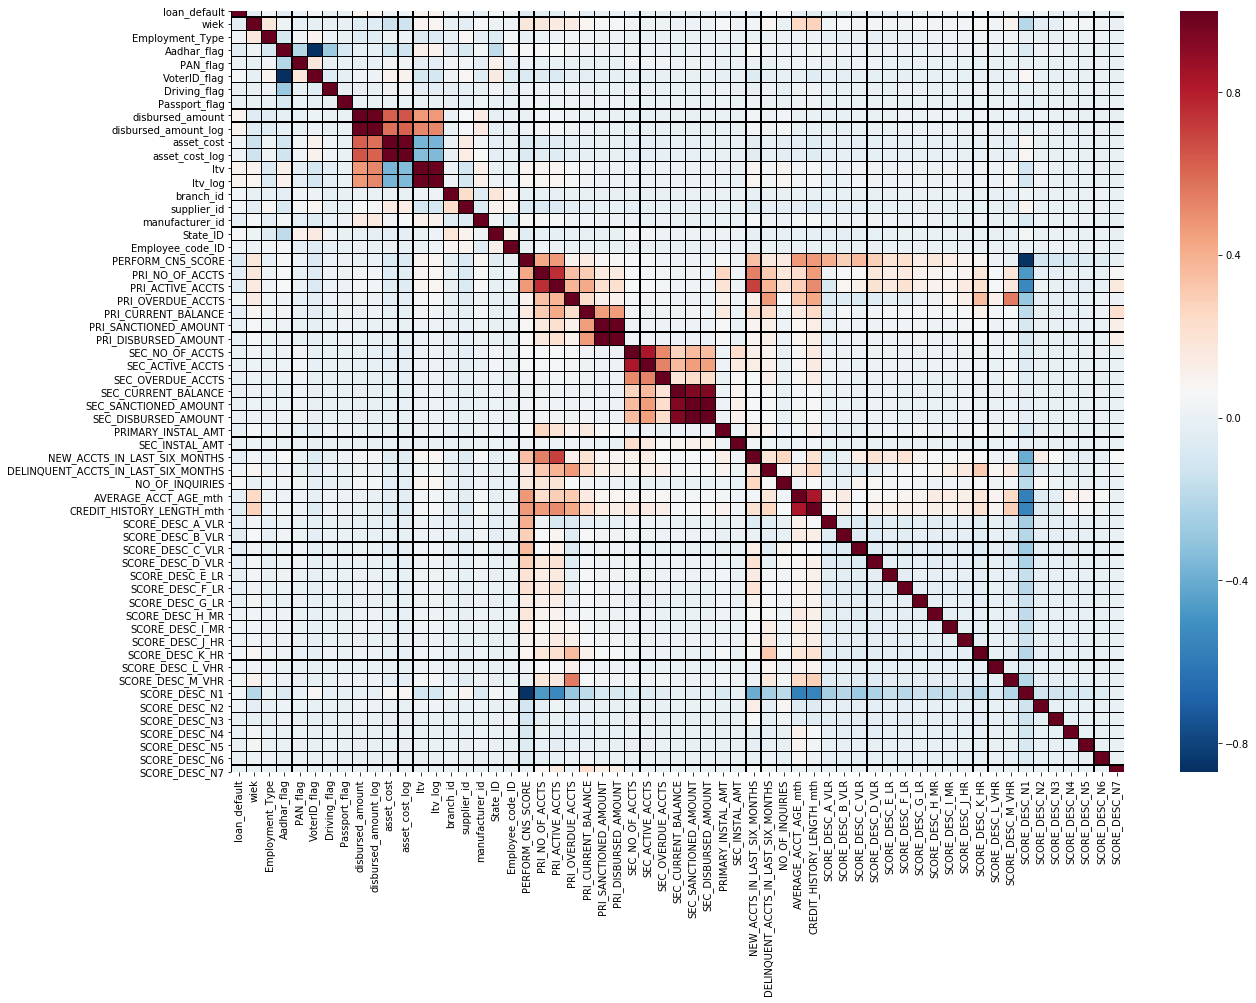

In [256]:
#import seaborn as sns
plt.figure(figsize = (20, 14))
corr2 = sns.heatmap(corr,  annot=False, linewidths=0.2, linecolor = 'black', cmap='RdBu_r') 
plt.savefig('1.png')

In [272]:
zbior.to_excel('zbior.xlsx')

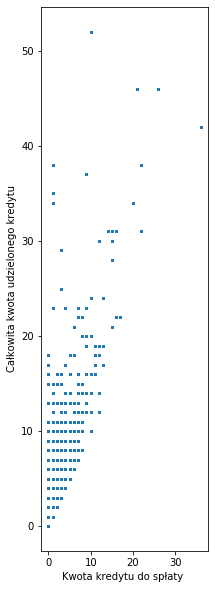

In [302]:
fig, ax = plt.subplots()
plt.scatter(zbior.SEC_ACTIVE_ACCTS , zbior.SEC_NO_OF_ACCTS  , s=5, norm=False, alpha=1, marker=",", label= True)
#ax.legend()
#ax.add_artist()
plt.ylabel('Całkowita kwota udzielonego kredytu')
plt.xlabel('Kwota kredytu do spłaty ')
plt.gcf().set_size_inches((3,10))

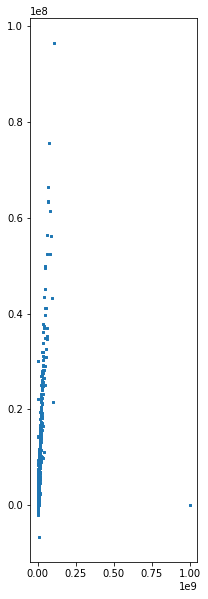

In [86]:
plt.scatter(zbior.PRI_DISBURSED_AMOUNT, zbior.PRI_CURRENT_BALANCE, s=5, norm=False, alpha=1, marker=",")
plt.gcf().set_size_inches((3,10))

TypeError: cannot unpack non-iterable PathCollection object

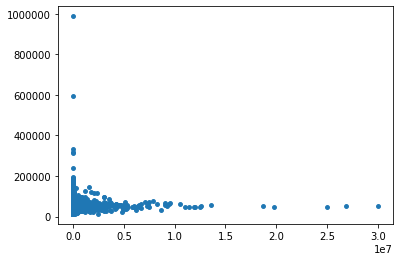

In [107]:
#plt.figure(figsize=(30,10))
fig, ax = plt.scatter(zbior.SEC_DISBURSED_AMOUNT, zbior.disbursed_amount, s=15, norm=False, alpha=1, marker="o")
#subplot.axes.ticklabel_format(style='plain', useOffset=False, axis='both')
#ax.ticklabel_format(style='plain')
#plt.title("xxx")
#plt.gcf().set_size_inches((10,10))

Text(0.5, 1.0, 'Wiek klientów')

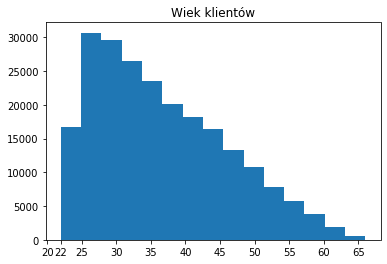

In [51]:
plt.hist(zbior.wiek2, bins=15)
plt.xticks([20, 25, 30, 35, 40, 45, 50, 55, 60, 65])
plt.title('Wiek klientów')

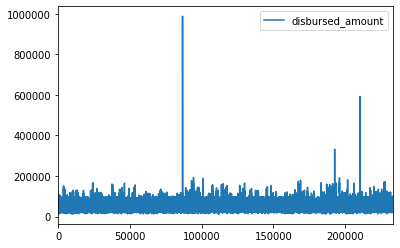

In [86]:
zbior[['disbursed_amount']].plot()

In [123]:
corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, disbursed_amount to SEC_SANCTIONED_AMOUNT
Data columns (total 13 columns):
disbursed_amount                       13 non-null float64
wiek2                                  13 non-null float64
asset_cost                             13 non-null float64
loan_default                           13 non-null float64
CREDIT_HISTORY_LENGTH_mth              13 non-null float64
AVERAGE_ACCT_AGE_mth                   13 non-null float64
NO_OF_INQUIRIES                        13 non-null float64
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS    13 non-null float64
NEW_ACCTS_IN_LAST_SIX_MONTHS           13 non-null float64
SEC_INSTAL_AMT                         13 non-null float64
PRIMARY_INSTAL_AMT                     13 non-null float64
SEC_DISBURSED_AMOUNT                   13 non-null float64
SEC_SANCTIONED_AMOUNT                  13 non-null float64
dtypes: float64(13)
memory usage: 2.0+ KB


In [8]:
zbior2 = zbior[['UniqueID', 'Date_of_Birth']]
zbior2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 2 columns):
UniqueID         233154 non-null int64
Date_of_Birth    233154 non-null object
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [37]:
zbior2.sort_values('Date_of_Birth')

,UniqueID,Date_of_Birth,count
90910,448427,01-01-00,1
55521,592974,01-01-00,1
170105,432993,01-01-00,1
61660,632098,01-01-00,1
147799,562688,01-01-00,1
...,...,...,...
224088,551003,31-12-99,0
133150,422086,31-12-99,0
97330,579575,31-12-99,0
110565,470782,31-12-99,0


In [38]:
zbior2.to_excel('zbior2.xlsx')

In [14]:
count = zbior2.groupby(['Date_of_Birth']).count()
print(count)

               UniqueID  count
Date_of_Birth                 
01-01-00            135    135
01-01-55             22     22
01-01-56             75     75
01-01-57             95     95
01-01-58            173    173
01-01-59            213    213
01-01-60            379    379
01-01-61            358    358
01-01-62            364    364
01-01-63            439    439
01-01-64            441    441
01-01-65            702    702
01-01-66            642    642
01-01-67            683    683
01-01-68            911    911
01-01-69            875    875
01-01-70           1203   1203
01-01-71           1142   1142
01-01-72           1100   1100
01-01-73           1335   1335
01-01-74           1273   1273
01-01-75           1641   1641
01-01-76           1527   1527
01-01-77           1469   1469
01-01-78           1646   1646
01-01-79           1438   1438
01-01-80           1821   1821
01-01-81           1764   1764
01-01-82           1691   1691
01-01-83           1841   1841
01-01-84

In [54]:
count = count_df.groupby(['Date_of_Birth']).count()
print(count)

               UniqueID  count
Date_of_Birth                 
01-01-00              1      1
01-01-55              1      1
01-01-56              1      1
01-01-57              1      1
01-01-58              1      1
01-01-59              1      1
01-01-60              1      1
01-01-61              1      1
01-01-62              1      1
01-01-63              1      1
01-01-64              1      1
01-01-65              1      1
01-01-66              1      1
01-01-67              1      1
01-01-68              1      1
01-01-69              1      1
01-01-70              1      1
01-01-71              1      1
01-01-72              1      1
01-01-73              1      1
01-01-74              1      1
01-01-75              1      1
01-01-76              1      1
01-01-77              1      1
01-01-78              1      1
01-01-79              1      1
01-01-80              1      1
01-01-81              1      1
01-01-82              1      1
01-01-83              1      1
01-01-84

In [48]:
count_df = pd.DataFrame(count)

In [51]:
count_df = count_df.reset_index()

In [55]:
sort_by = count_df.sort_values('count', ascending=False)

In [64]:
top138 = sort_by.head(138)
print(top138)

     Date_of_Birth  UniqueID  count
34        01-01-88      2173   2173
36        01-01-90      2170   2170
33        01-01-87      2127   2127
32        01-01-86      2063   2063
31        01-01-85      2005   2005
37        01-01-91      1985   1985
35        01-01-89      1962   1962
39        01-01-93      1930   1930
38        01-01-92      1924   1924
41        01-01-95      1924   1924
40        01-01-94      1867   1867
29        01-01-83      1841   1841
26        01-01-80      1821   1821
30        01-01-84      1768   1768
27        01-01-81      1764   1764
42        01-01-96      1759   1759
28        01-01-82      1691   1691
24        01-01-78      1646   1646
21        01-01-75      1641   1641
43        01-01-97      1557   1557
22        01-01-76      1527   1527
23        01-01-77      1469   1469
25        01-01-79      1438   1438
19        01-01-73      1335   1335
20        01-01-74      1273   1273
16        01-01-70      1203   1203
17        01-01-71      1142

In [68]:
top138.info()
top138.to_excel('top138.xlsx')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 34 to 76
Data columns (total 3 columns):
Date_of_Birth    138 non-null object
UniqueID         138 non-null int64
count            138 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.3+ KB


In [67]:
zbior3 = zbior([zbior.Date_of_Birth != top138.Date_of_Birth])

ValueError: Can only compare identically-labeled Series objects

In [53]:
count_df.to_excel('count.xlsx')

In [61]:
count_sorted = count.sort_values('count', ascending = False)
count_sorted.head()

,UniqueID,count
Date_of_Birth,,
01-01-00,1,1
20-12-63,1,1
20-12-95,1,1
20-12-96,1,1
20-12-97,1,1


In [35]:
count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15433 entries, 01-01-00 to 31-12-99
Data columns (total 2 columns):
UniqueID    15433 non-null int64
count       15433 non-null int64
dtypes: int64(2)
memory usage: 361.7+ KB


TypeError: 'AxesSubplot' object is not callable

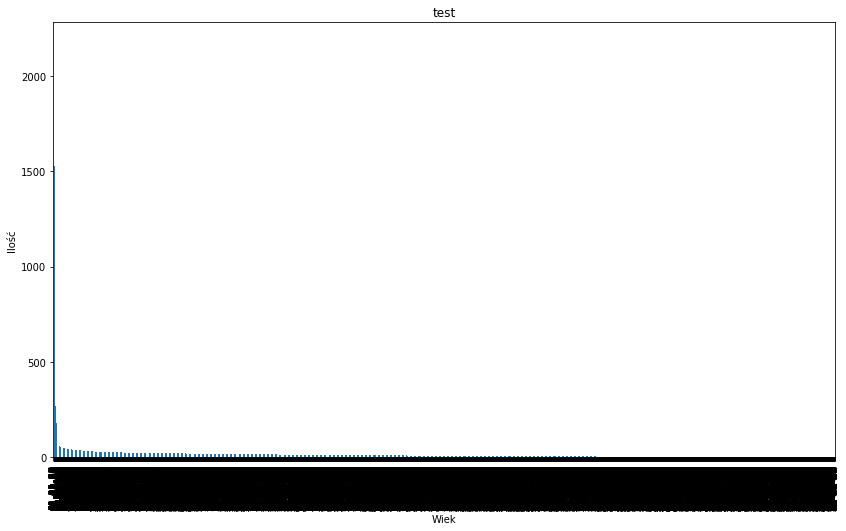

In [28]:
wykr = zbior['Date_of_Birth'].value_counts().plot(kind='bar', figsize=(10,8), title="test", x ='channel')
wykr.set_xlabel("Wiek")
wykr.set_ylabel("Ilość")
wykr()

In [53]:
defaults = zbior[zbior['loan_default'] == 1]
non-defaults = zbior[zbior['loan_default'] == 0]
#print(defaults)
#defaults.to_excel("defaults.xlsx")
# tworzy oddzielny plik z defaultami

In [67]:
defaults.head()
defaults.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,loan_default,wiek2,AVERAGE_ACCT_AGE_mth,CREDIT_HISTORY_LENGTH_mth
count,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00,48967.00
mean,540045.62,56163.95,76180.60,76.94,77.13,19828.49,68.00,3503.32,7.67,1589.39,1.00,0.81,0.08,0.18,0.02,0.00,254.61,2.11,0.90,0.20,118760.87,170453.33,170638.24,0.05,0.02,0.01,3754.69,5233.96,5160.77,10040.12,282.21,0.33,0.12,0.27,1.00,35.77,8.28,14.09
std,70841.11,12099.97,18592.90,10.32,72.22,3455.09,22.29,2262.15,4.55,979.88,0.00,0.39,0.27,0.38,0.15,0.04,319.22,5.06,1.67,0.61,729947.10,4600523.85,4601905.52,0.53,0.29,0.11,107806.61,132878.44,132548.22,125819.89,11208.99,0.89,0.43,0.84,0.00,9.52,14.55,25.53
min,417439.00,13369.00,37000.00,15.30,1.00,10524.00,45.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-2018309.00,0.00,0.00,0.00,0.00,0.00,-9625.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,23.00,0.00,0.00
25%,477396.00,49303.00,65800.00,72.13,16.00,16680.00,45.00,1541.00,4.00,738.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,28.00,0.00,0.00
50%,544061.00,55359.00,71205.00,79.12,64.00,20672.00,51.00,2989.00,6.00,1512.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,34.00,0.00,0.00
75%,603702.00,61923.00,79950.00,84.71,135.00,23118.00,86.00,5838.00,12.00,2417.00,1.00,1.00,0.00,0.00,0.00,0.00,611.50,2.00,1.00,0.00,26460.50,50000.00,50000.00,0.00,0.00,0.00,0.00,0.00,0.00,1899.00,0.00,0.00,0.00,0.00,1.00,42.00,12.00,21.00
max,658671.00,191392.00,281164.00,95.00,261.00,24803.00,153.00,7343.00,22.00,3795.00,1.00,1.00,1.00,1.00,1.00,1.00,879.00,453.00,35.00,18.00,45051160.00,1000000000.00,1000000000.00,38.00,22.00,6.00,10716039.00,11900000.00,11900000.00,15420411.00,1447600.00,20.00,12.00,19.00,1.00,66.00,188.00,468.00


In [135]:
wyliczenia = zbior[[ 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'AVERAGE_ACCT_AGE_mth', 'CREDIT_HISTORY_LENGTH_mth',]].describe()

In [136]:
wyliczenia.to_excel('wyliczenia.xlsx')

In [117]:
zbior.wiek.describe()

count   233154.00
mean        36.10
std          9.81
min         20.00
25%         28.00
50%         34.00
75%         43.00
max         71.00
Name: wiek, dtype: float64

In [118]:
zbior.disbursed_amount_log.describe()

count   233154.00
mean        10.88
std          0.23
min          9.50
25%         10.76
50%         10.89
75%         11.01
max         13.81
Name: disbursed_amount_log, dtype: float64

In [15]:
non_defaults = zbior[zbior['loan_default']==0]
non_defaults.to_excel("non_defaults.xlsx")

In [258]:
sns.pairplot(zbior, vars=['PRI_DISBURSED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'SEC_SANCTIONED_AMOUNT', 'CREDIT_HISTORY_LENGTH_mth', 'SEC_ACTIVE_ACCTS', 'PRI_ACTIVE_ACCTS', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'asset_cost_log', 'asset_cost', 'SCORE_DESC_M_VHR', 'SEC_OVERDUE_ACCTS', 'ltv_log', 'ltv', 'AVERAGE_ACCT_AGE_mth', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'PRI_SANCTIONED_AMOUNT', 'PRI_NO_OF_ACCTS', 'PRI_CURRENT_BALANCE', 'SCORE_DESC_A_VLR', 'SCORE_DESC_N1', 'VoterID_flag', 'SEC_CURRENT_BALANCE', 'SEC_NO_OF_ACCTS', 'PERFORM_CNS_SCORE', 'disbursed_amount', 'disbursed_amount_log', 'PRI_OVERDUE_ACCTS', 'Aadhar_flag', ])

Error in callback <function flush_figures at 0x0000022E73D9C798> (for post_execute):


KeyboardInterrupt: 

In [88]:
sns.pairplot(korel)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001F155CBCA68> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001F155D97F78> (for post_execute):


KeyboardInterrupt: 

TypeError: 'AxesSubplot' object is not callable

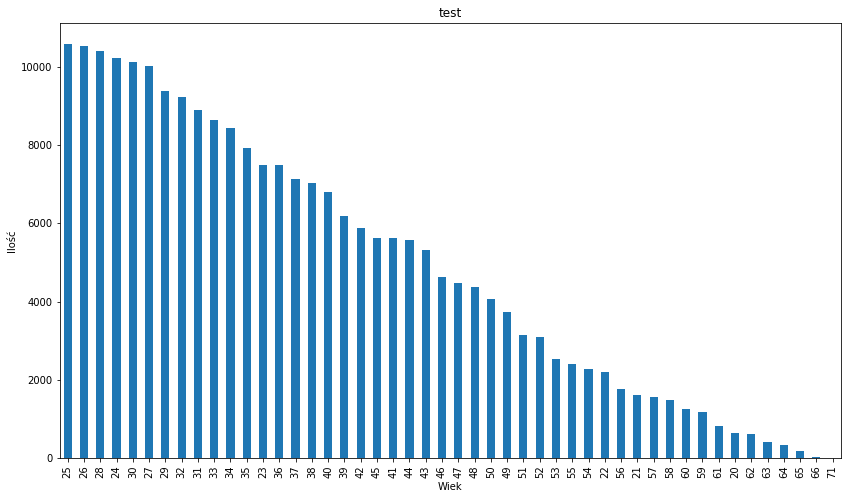

In [10]:
Score = zbior['wiek'].value_counts().plot(kind='bar', figsize=(14,8), title="test", x ='channel')
Score.set_xlabel("Wiek")
Score.set_ylabel("Ilość")
Score()

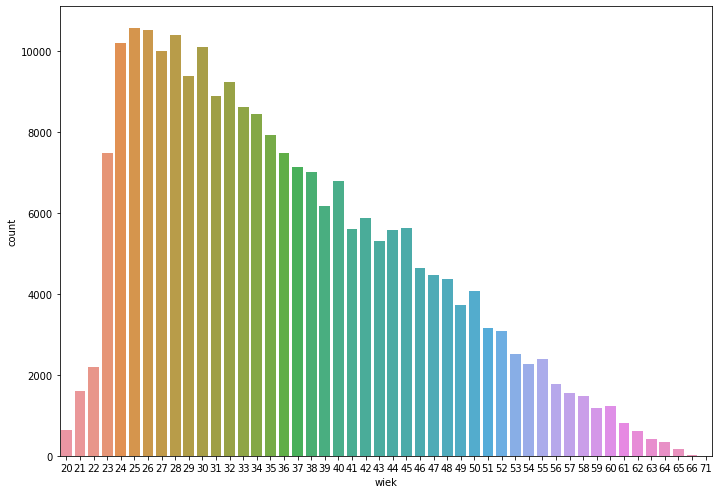

In [114]:
figsize = (40,20)
sns.countplot(zbior.wiek)
plt.gcf().set_size_inches(11.7, 8.27)

Text(0.5, 1.0, 'Rozkład zmiennej "default" względem wieku klientów')

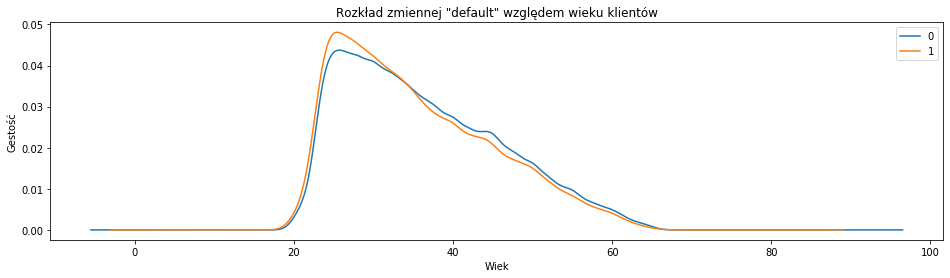

In [105]:
#zbior.wiek2.plot(kind='kde')
zbior.groupby('loan_default').wiek.plot(kind='kde')
plt.legend()
plt.ylabel("Gestość")
plt.xlabel('Wiek')
plt.title('Rozkład zmiennej "default" względem wieku klientów')

Text(0.5, 1.0, 'Rozkład zmiennej "default" względem kwoty kredytu po przekształceniu log.')

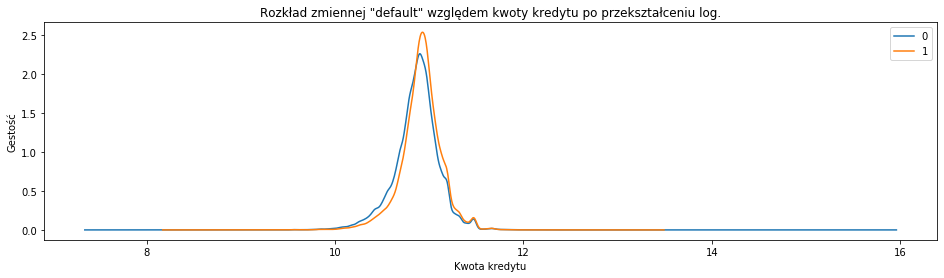

In [111]:
zbior.groupby('loan_default').disbursed_amount_log.plot(kind='kde')
plt.legend()
plt.ylabel("Gestość")
plt.xlabel('Kwota kredytu')
plt.title('Rozkład zmiennej "default" względem kwoty kredytu po przekształceniu log.')

Text(0.5, 1.0, 'Rozkład zmiennej "default" względem kosztu kredytu')

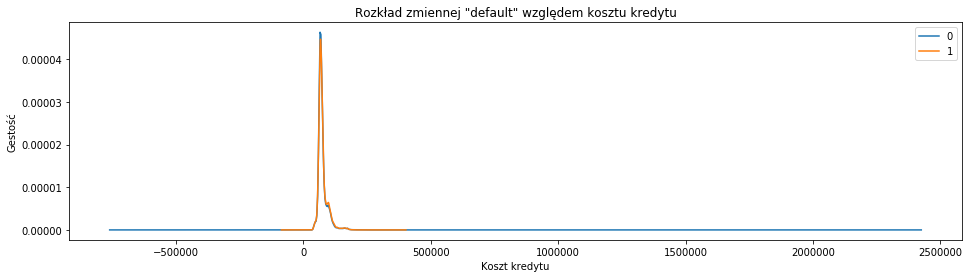

In [108]:
zbior.groupby('loan_default').asset_cost.plot(kind='kde')
plt.legend()
plt.ylabel("Gestość")
plt.xlabel('Koszt kredytu')
plt.title('Rozkład zmiennej "default" względem kosztu kredytu')

MobileNo_Avl_Flag
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: wiek2, dtype: object

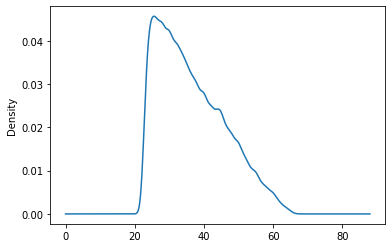

In [17]:
zbior.groupby('MobileNo_Avl_Flag').wiek2.plot(kind='kde')

Aadhar_flag
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: wiek2, dtype: object

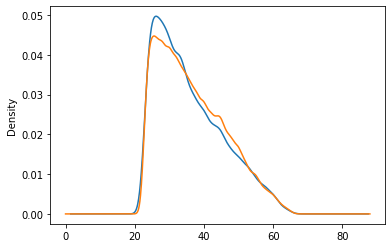

In [18]:
zbior.groupby('Aadhar_flag').wiek2.plot(kind='kde')

Driving_flag
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: wiek2, dtype: object

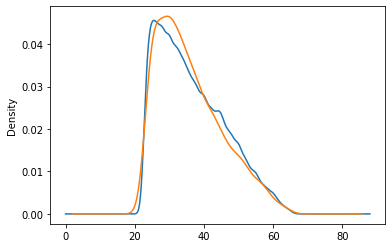

In [19]:
zbior.groupby('Driving_flag').wiek2.plot(kind='kde')

Passport_flag
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: wiek2, dtype: object

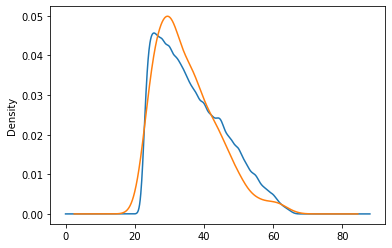

In [20]:
zbior.groupby('Passport_flag').wiek2.plot(kind='kde')

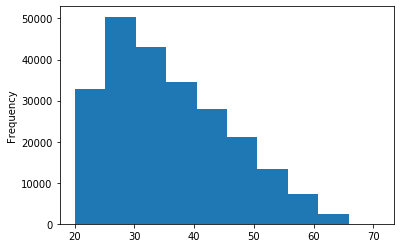

In [12]:
zbior['wiek'].plot.hist()
#zbior['loan_default'].plot.hist()

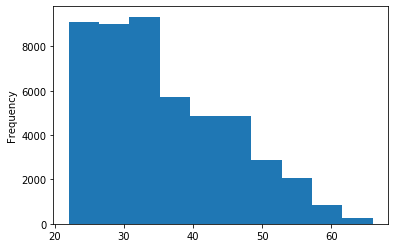

In [22]:
zbior["wiek2"].plot(kind="hist", weights=zbior["loan_default"])

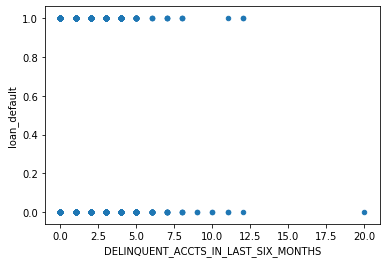

In [31]:
zbior.plot.scatter('DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'loan_default')
#plt.xscale('log')
#plt.xticks([10, 100, 1000])
plt.show()

In [218]:
Q1 = zbior.disbursed_amount_log.quantile(0.25) #10.76
Q3 = zbior.disbursed_amount_log.quantile(0.75) #11.00
IQR = Q3 - Q1 #0.24
O1 = Q1 -1.5*0.24
O2 = Q3 + 1.5*0.24
print(O1, O2)

10.401004448831893 11.36897614514367


In [226]:
zbior2 = zbior[zbior.disbursed_amount_log > 10.40] 

In [228]:
zbior3 = zbior2[zbior2.disbursed_amount_log < 11.36]
#      -

In [232]:
o = 233154 - 220349
o #12805

12805

In [243]:
Q1 = zbior.disbursed_amount.quantile(0.25) #47145.0
Q3 = zbior.disbursed_amount.quantile(0.75) #60413.0
IQR = Q3 - Q1 #13268
O1 = Q1 -1.5*13268 #27243
O2 = Q3 + 1.5*13268 #80315
print(O1, O2)

27243.0 80315.0


In [244]:
zbior2 = zbior[zbior.disbursed_amount > 27243] 

In [246]:
zbior3 = zbior2[zbior2.disbursed_amount < 80315]

In [248]:
o = 233154 - 223153
o #10001

10001

In [247]:
zbior3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223285 entries, 0 to 233153
Data columns (total 73 columns):
UniqueID                               223285 non-null int64
disbursed_amount                       223285 non-null int64
asset_cost                             223285 non-null int64
ltv                                    223285 non-null float64
branch_id                              223285 non-null int64
supplier_id                            223285 non-null int64
manufacturer_id                        223285 non-null int64
Current_pincode_ID                     223285 non-null int64
Date_of_Birth                          223285 non-null object
Employment_Type                        223285 non-null float64
DisbursalDate                          223285 non-null object
State_ID                               223285 non-null int64
Employee_code_ID                       223285 non-null int64
MobileNo_Avl_Flag                      223285 non-null int64
Aadhar_flag                  

In [206]:
zbior['disbursed_amount_log'].describe()

count   233154.00
mean        10.88
std          0.23
min          9.50
25%         10.76
50%         10.89
75%         11.01
max         13.81
Name: disbursed_amount_log, dtype: float64

In [196]:
disbursed_amount_log_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 73 columns):
UniqueID                               0 non-null int64
disbursed_amount                       0 non-null int64
asset_cost                             0 non-null int64
ltv                                    0 non-null float64
branch_id                              0 non-null int64
supplier_id                            0 non-null int64
manufacturer_id                        0 non-null int64
Current_pincode_ID                     0 non-null int64
Date_of_Birth                          0 non-null object
Employment_Type                        0 non-null float64
DisbursalDate                          0 non-null object
State_ID                               0 non-null int64
Employee_code_ID                       0 non-null int64
MobileNo_Avl_Flag                      0 non-null int64
Aadhar_flag                            0 non-null int64
PAN_flag                               0 non-null int64
Voter

In [175]:
zbior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 73 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date_of_Birth                          233154 non-null object
Employment_Type                        233154 non-null float64
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                  

In [153]:
wiek_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 1184 to 225982
Data columns (total 73 columns):
UniqueID                               22 non-null int64
disbursed_amount                       22 non-null int64
asset_cost                             22 non-null int64
ltv                                    22 non-null float64
branch_id                              22 non-null int64
supplier_id                            22 non-null int64
manufacturer_id                        22 non-null int64
Current_pincode_ID                     22 non-null int64
Date_of_Birth                          22 non-null object
Employment_Type                        22 non-null float64
DisbursalDate                          22 non-null object
State_ID                               22 non-null int64
Employee_code_ID                       22 non-null int64
MobileNo_Avl_Flag                      22 non-null int64
Aadhar_flag                            22 non-null int64
PAN_flag                     

In [155]:
wiek_o.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_Type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,loan_default,rok_ur2,wiek,acc_age_rok,acc_age_mies,AVERAGE_ACCT_AGE_mth,credit_hist_rok,credit_hist_mies,CREDIT_HISTORY_LENGTH_mth,SCORE_DESC_A_VLR,SCORE_DESC_B_VLR,SCORE_DESC_C_VLR,SCORE_DESC_D_VLR,SCORE_DESC_E_LR,SCORE_DESC_F_LR,SCORE_DESC_G_LR,SCORE_DESC_H_MR,SCORE_DESC_I_MR,SCORE_DESC_J_HR,SCORE_DESC_K_HR,SCORE_DESC_L_VHR,SCORE_DESC_M_VHR,SCORE_DESC_N1,SCORE_DESC_N2,SCORE_DESC_N3,SCORE_DESC_N4,SCORE_DESC_N5,SCORE_DESC_N6,SCORE_DESC_N7,disbursed_amount_log,asset_cost_log,ltv_log
count,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00
mean,537255.00,44907.68,65946.14,70.57,69.64,19247.41,74.77,2497.59,1.64,7.00,1735.36,1.00,0.91,0.18,0.09,0.00,0.00,316.41,3.73,0.95,0.18,1319852.86,1406759.36,1402247.32,0.00,0.00,0.00,0.00,0.00,0.00,44644.41,0.00,0.23,0.05,0.09,0.18,53.77,66.23,1.45,2.91,20.36,3.05,3.73,40.27,0.14,0.14,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.27,0.00,0.05,0.18,0.09,0.00,0.00,10.69,11.09,4.26
std,77533.82,10050.42,8114.19,12.31,56.59,3871.42,21.49,2472.94,0.58,4.62,879.21,0.00,0.29,0.39,0.29,0.00,0.00,382.07,4.89,2.10,0.39,5941137.40,6149559.41,6131637.46,0.00,0.00,0.00,0.00,0.00,0.00,148584.54,0.00,0.53,0.21,0.29,0.39,1.07,1.07,1.50,3.46,18.92,3.51,4.18,44.35,0.35,0.35,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0.21,0.00,0.00,0.00,0.46,0.00,0.21,0.39,0.29,0.00,0.00,0.24,0.12,0.18
min,420977.00,26829.00,50816.00,46.04,2.00,13931.00,45.00,7.00,0.00,1.00,709.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,49.00,66.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.20,10.84,3.85
25%,464081.00,39679.75,61514.25,66.19,20.00,15561.25,46.50,439.25,1.00,4.00,1103.00,1.00,1.00,0.00,0.00,0.00,0.00,4.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,54.00,66.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.59,11.03,4.21
50%,546572.00,45699.50,63608.50,71.06,62.00,18694.50,86.00,1583.00,2.00,6.00,1505.00,1.00,1.00,0.00,0.00,0.00,0.00,17.50,1.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,54.00,66.00,1.00,1.50,19.50,3.00,2.00,38.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.73,11.06,4.28
75%,596066.25,52487.25,70522.75,79.04,112.75,22878.50,86.00,4490.25,2.00,11.00,2470.00,1.00,1.00,0.00,0.00,0.00,0.00,759.00,5.75,1.00,0.00,3561.00,29700.00,24302.75,0.00,0.00,0.00,0.00,0.00,0.00,20503.75,0.00,0.00,0.00,0.00,0.00,54.00,66.00,2.00,5.00,29.75,4.00,7.00,56.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.75,0.00,0.00,0.00,0.00,0.00,0.00,10.87,11.16,4.38
max,652399.00,61736.00,82853.00,89.99,162.00,24496.00,120.00,6840.00,2.00,15.00,3465.00,1.00,1.00,1.00,1.00,0.00,0.00,836.00,18.00,8.00,1.00,27910904.00,28910000.00,28825124.00,0.00,0.00,0.00,0.00,0.00,0.00,697826.00,0.00,2.00,1.00,1.00,1.00,54.0

In [39]:
wiek_out = pd.DataFrame(zbior.wiek2 > 65.5)
wiek_out.head()

,wiek2
0,False
1,False
2,False
3,False
4,False


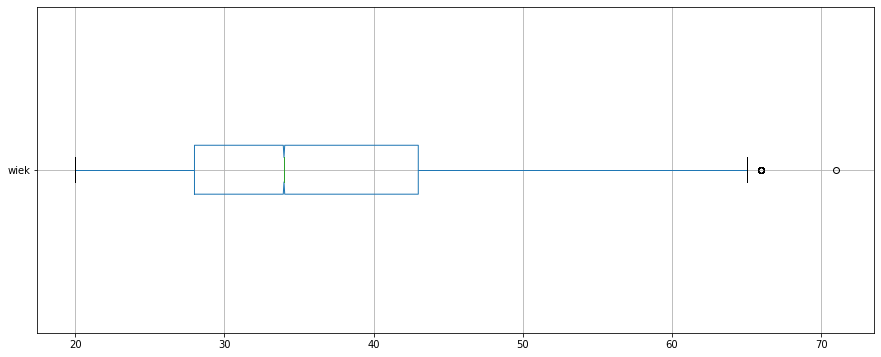

In [31]:
zbior[['wiek']].boxplot(vert=False, 
                                  figsize=(15,6), 
                                  notch=True, 
                                  patch_artist=False
                                  #boxdrops=dict(facecolor=c, color=c)
                                 )
#plt.xlim(50)
#plt.xticks([10, 50])
#plt.subplots_adjust(left=0,25)
plt.show()


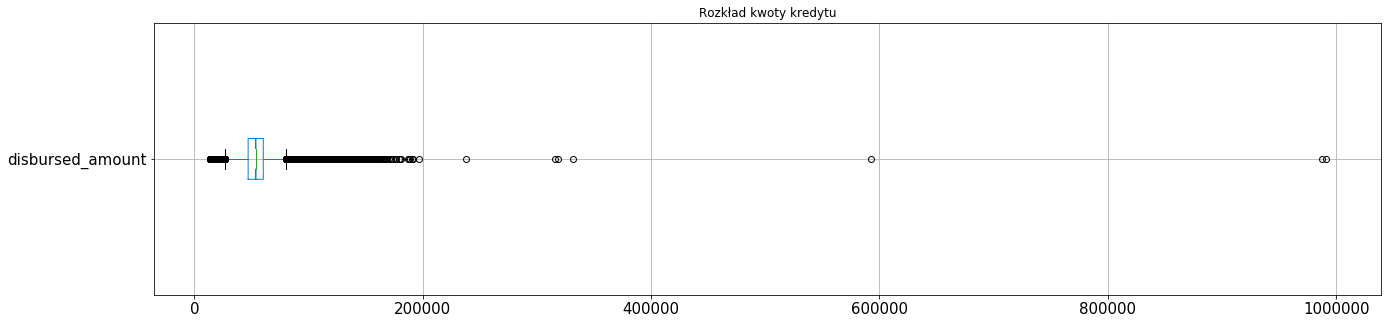

In [84]:
zbior[['disbursed_amount']].boxplot(vert=False, 
                                  figsize=(22,5), 
                                  notch=True, 
                                  patch_artist=False, 
                                    fontsize=15)
#plt.xlim(50)
#plt.xticks([10, 50])
#plt.subplots_adjust(left=0,25)
plt.title('Rozkład kwoty kredytu')
xlabel = ''
plt.show()

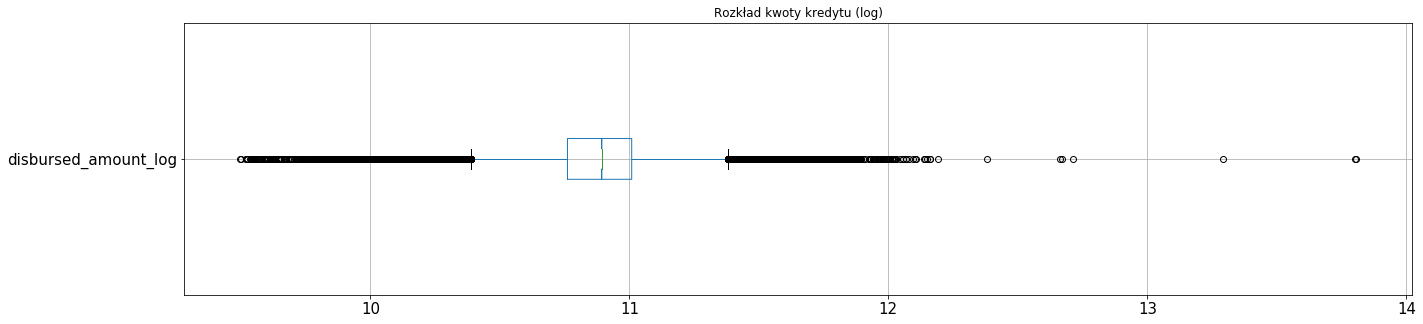

In [112]:
zbior[['disbursed_amount_log']].boxplot(vert=False, 
                                  figsize=(22,5), 
                                  notch=True, 
                                  patch_artist=False, 
                                    fontsize=15)
#plt.xlim(50)
#plt.xticks([10, 50])
#plt.subplots_adjust(left=0,25)
plt.title('Rozkład kwoty kredytu (log)')
plt.show()

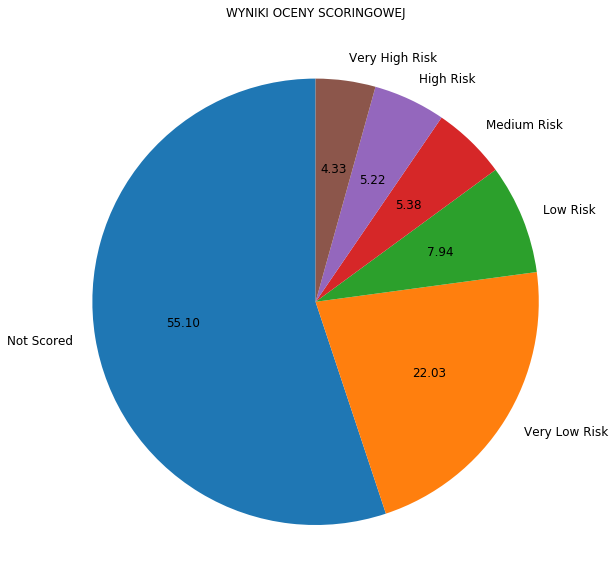

In [296]:
#wykres "WYNIKI OCENY SCORINGOWEJ"
plt.figure(figsize=(10,25))
zbior.PERFORM_CNS_SCORE_DESCRIPTION2.value_counts().plot(kind='pie', startangle=90, autopct='%.2f', fontsize=12, label='', title="WYNIKI OCENY SCORINGOWEJ" )



In [121]:
zbior.wiek2.mean()

36.448009472577866

In [122]:
zbior.wiek2.std()

9.666254472381578

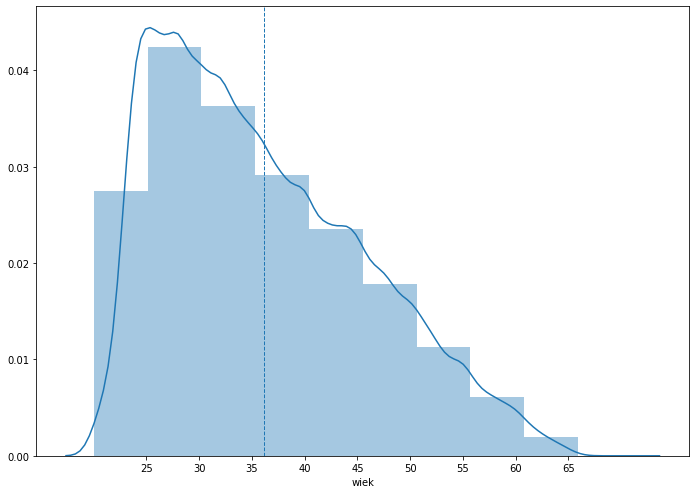

In [130]:
sns.distplot(zbior.wiek, bins=10, kde=True, hist=True, norm_hist=False)
plt.gcf().set_size_inches(11.7, 8.27)
plt.xticks([25,30, 35, 40, 45, 50, 55, 60, 65])
plt.axvline(zbior.wiek.mean(), linestyle='dashed', linewidth=1)
#plt.axvline(zbior.wiek2.std())

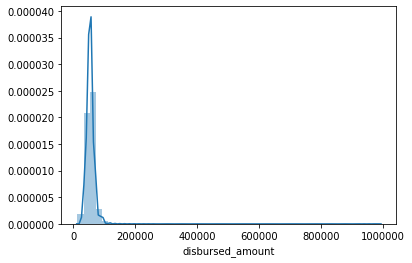

In [29]:
sns.distplot(zbior.disbursed_amount)